In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("../dataset/debs-2022-gc-test-set-trading.csv.bz2", compression='bz2')

In [3]:
data.index

Index(['FREN4.FR', 'INC2U.FR', 'CBOT.FR', 'LC1EP.FR', 'IEMIM.FR', 'ICEUU.FR',
       'MLCMI.FR', 'I2GS.FR', 'QDT.FR', 'INDAX.FR',
       ...
       'A1EX2G.ETR', 'A2GTB4.ETR', 'A1EXZC.ETR', 'A1EX2Y.ETR', 'A1EX2L.ETR',
       'A2GTCD.ETR', 'A1EX2E.ETR', 'A1EXZE.ETR', 'A1EX2J.ETR', 'A2GTCC.ETR'],
      dtype='object', length=999998)

In [4]:
# Let us grab one example of stocks here, for example 'A1EXZE.ETR'
my_stock = data[data.index=='A1EXZE.ETR']

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

my_stock

,ID,SecType,Date,Time,Ask,Ask volume,Bid,Bid volume,Ask time,Day's high ask,...,Nominal value,Last,Last volume,Trading time,Total volume,Mid price,Trading date,Profit,Current price,Related indices
A1EXZE.ETR,I,08-11-2021,04:54:10.619,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.00,NaN,00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A1EXZE.ETR,I,08-11-2021,09:02:44.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3387.20,NaN,09:02:44.120,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A1EXZE.ETR,I,08-11-2021,09:02:45.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3388.83,NaN,09:02:45.120,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A1EXZE.ETR,I,08-11-2021,09:02:46.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3391.56,NaN,09:02:46.120,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A1EXZE.ETR,I,08-11-2021,09:02:47.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3391.41,NaN,09:02:47.120,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A1EXZE.ETR,I,08-11-2021,09:20:10.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3364.56,NaN,09:20:10.470,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A1EXZE.ETR,I,08-11-2021,09:20:11.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3364.56,NaN,09:20:11.470,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A1EXZE.ETR,I,08-11-2021,09:20:12.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3365.25,NaN,09:20:12.470,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A1EXZE.ETR,I,08-11-2021,09:20:13.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3365.55,NaN,09:20:13.470,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
price = my_stock['Nominal value']
price
# for i in price:
#      print(i)

A1EXZE.ETR       0.00
A1EXZE.ETR    3387.20
A1EXZE.ETR    3388.83
A1EXZE.ETR    3391.56
A1EXZE.ETR    3391.41
               ...   
A1EXZE.ETR    3364.56
A1EXZE.ETR    3364.56
A1EXZE.ETR    3365.25
A1EXZE.ETR    3365.55
A1EXZE.ETR    3364.17
Name: Nominal value, Length: 1051, dtype: float64

In [6]:
np.arange(price.size)

array([   0,    1,    2, ..., 1048, 1049, 1050])

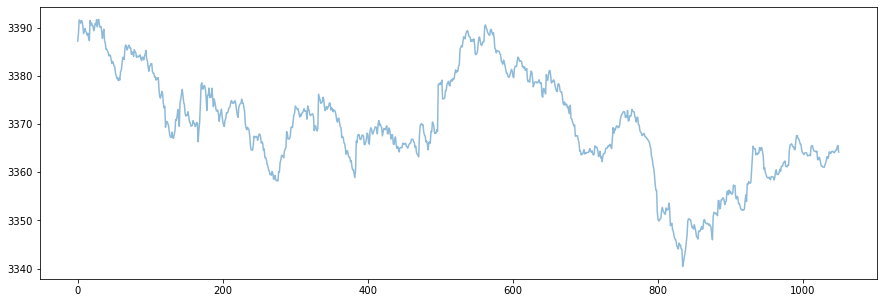

In [7]:
# make-inline-plots-in-jupyter-notebook-larger
plt.rcParams['figure.figsize'] = [15, 5]

# We do not start from zero for this visualization 
plt.plot(np.arange(price.size-1), price[1:], alpha=0.5)
plt.show()

In [8]:
price_list = list(price)

In [9]:
print(price.size)


# Calculate EMA with different smoothing factors 
def cal_ema(price_list, smooth):
    ema = []

    for i in range(len(price_list)-1):
        if (i == 0):
            ema.append((price_list[i] * (2 / (1 + smooth) ) ))
        else:
            ema.append((price_list[i] * (2 / (1 + smooth) ) ) + ema[i-1] * (1 - (2 / (1 + smooth) ) ) )
    return ema
    

# cal_ema(price_list, 38)

1051


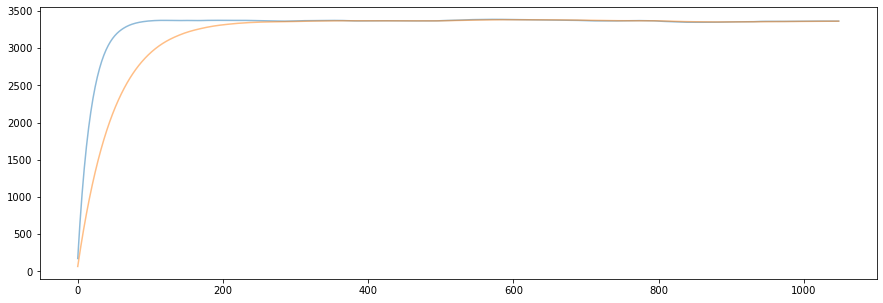

In [10]:
plt.rcParams['figure.figsize'] = [15, 5]

# We do not start from zero for this visualization 
# plt.plot(np.arange(price.size-1), price[1:], alpha=0.5)
plt.plot(np.arange(len(price_list)-2), cal_ema(price_list, 38)[1:], alpha=0.5)
plt.plot(np.arange(len(price_list)-2), cal_ema(price_list, 100)[1:], alpha=0.5)

plt.show()